# Getting Started with Interactive Mapping and Data Visualization
#### Prepared for 2021 GIS Day Workshop

This notebook will walk you through some basic techniques of conducting <b>Interative Mapping and Data Visualization</b> in the CyberGIS-Jupyter environment. We will retrieve the latest COVID-19 data from the [Illinois Department of Public Health](https://dph.illinois.gov/covid19/data/data-portal.html) (IDPH) website, examine and preprocess the data, make plots of daily new cases by counties using [matplotlib](https://matplotlib.org/), create an interactive map with [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/) to visualize weekly channge of new cases across the state, and finally link map and plot together to make it a "app-style" notebook. You are encouraged to tweak the codes a little bit to visualize other COVID-19 indices, such as deaths and testings. 

## Notebook Outline:
- [Introduction](#intro)
- [Setup](#setup) (run this first!)
- [Data retrieval and preprocessing](#data_processing)
    - [Download data from IDPH website](#download_data)
    - [Examine raw data](examine_data)
- [Plot time series data for a county](#time_series)
- [Python Fundamentals](#py_fund)
    - [Python as a Calculator](#py_calc)
    - [Comments](#py_comment)
    - [Creating variables](#py_creat_var)
    - [Whitespace](#py_whitespace)
    - [Basic Object Types](#py_basic_obj)
    - [Boolean Operators and Comparisons](#py_bool_compar)
    - [Control Flow](#py_contl_flow)
    - [Importing Libraries](#py_import)
    - [Loop Structures](#py_loops)
    - [List Comprehension](#py_list_comp)
    - [Custom Functions](#py_func)
    - [File Operations](#py_file_ops)
- [Geospatial Data Processing](#geos_data_proc)
    - [Basic Plotting](#basic_plot)
    - [Basic Image Visualization](#basic_vis)

<a id='setup'></a>
## Setup
This cell is to import required modules and libs. A breif description on the purpose of each libs can be found below:

 - [json](https://docs.python.org/3/library/json.html) - standard Python module for JSON format I/O operations
 - [wget]() - for downloading files from URLs
 - [numpy](https://numpy.org/) - for handling N-dimentional arrays and numerical computing
 - [pandas](https://pandas.pydata.org/) - for tabular data analysis and manipulation
 - [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/) - for interactive mapping in Jupyter Notebook environment
 - [branca](https://python-visualization.github.io/branca/colormap.html) - for dealing with colormaps
 - [matplotlib]() - for creating plots and figures 

In [2]:
import json
import wget
import numpy as np
import pandas as pd
import ipyleaflet
from branca.colormap import linear
import matplotlib.pyplot as plt

# for interactive charting
%matplotlib notebook

<a id='data_processing'></a>
## Data retrieval and preprocessing

The [Illinois Department of Public Health](https://dph.illinois.gov/) has a [COVID-19 data portal](https://dph.illinois.gov/covid19/data/data-portal.html) that provides different metrics and data, including "county-level histrorical cases, deaths and tested", "hospitalization data", "vaccine administration data", "zipcode-level cases and tested data" and others. As noted on the website, data avaialbility, update frequency, data format and content are subject to change.

The next cell will programmatically download the latest "county-level histrorical cases, deaths and tested" data on the fly. Since IDPH may choose to stop updating or remove the data from their website in the future, we downloaded the data as of Nov 10, 2021 and saved it (filename: idph_counties_Nov10_2021.csv) alongside the notebook for archive.

<a id='download_data'></a>
### Download data from IDPH website

In [8]:
# Download the latest data from IDPH website
# https://dph.illinois.gov/covid19/data/data-portal/all-county-historical-snapshot.html
idph_counties_url = "https://idph.illinois.gov/DPHPublicInformation/api/COVIDExport/GetSnapshotHistorical?format=csv"
idph_counties_csv = wget.download(idph_counties_url, out="./idph_counties.csv")

## If you see any error in this cell, that probably indicates IDPH has removed this data from their website
## You can continute with this notebook using an archived data by uncommenting the following line and re-run this cell
#idph_counties_csv = "idph_counties_Nov10_2021.csv"

print("Using data at {}".format(idph_counties_csv))

Using data at ./idph_counties (1).csv


<a id='examine_data'></a>
### Examine raw data
The raw data is a csv file. We load it into a pandas dataframe (the 1st row is ignored as it is the title line). Each row includes metrics of a specific county reported on a specific day. We can see the earliest data is from 2020-03-17 and the rows at the bottom are the most recent data.

In [9]:
df = pd.read_csv(idph_counties_csv, skiprows=1, parse_dates=['ReportDate'])
df

,CountyName,CumulativeCases,CasesChange,TotalTested,TotalTestedChange,Deaths,DeathsChange,ReportDate
0,Adams,0,0,0,0,0,0,2020-03-17
1,Alexander,0,0,0,0,0,0,2020-03-17
2,Bond,0,0,0,0,0,0,2020-03-17
3,Boone,0,0,0,0,0,0,2020-03-17
4,Brown,0,0,0,0,0,0,2020-03-17
...,...,...,...,...,...,...,...,...
62811,Whiteside,8566,27,119926,745,187,0,2021-11-10
62812,Will,94280,280,1557841,5883,1146,0,2021-11-10
62813,Williamson,12303,17,177164,673,181,0,2021-11-10
62814,Winnebago,43366,246,637935,2411,569,1,2021-11-10


List all county names. Note that IDPH separates Chicago city area from from Cook county in this dataset, and it treats Chicago as standalone county.

In [10]:
df.CountyName.unique()

array(['Adams', 'Alexander', 'Bond', 'Boone', 'Brown', 'Bureau',
       'Calhoun', 'Carroll', 'Cass', 'Champaign', 'Chicago', 'Christian',
       'Clark', 'Clay', 'Clinton', 'Coles', 'Cook', 'Crawford',
       'Cumberland', 'De Witt', 'DeKalb', 'Douglas', 'DuPage', 'Edgar',
       'Edwards', 'Effingham', 'Fayette', 'Ford', 'Franklin', 'Fulton',
       'Gallatin', 'Greene', 'Grundy', 'Hamilton', 'Hancock', 'Hardin',
       'Henderson', 'Henry', 'Illinois', 'Iroquois', 'Jackson', 'Jasper',
       'Jefferson', 'Jersey', 'Jo Daviess', 'Johnson', 'Kane', 'Kankakee',
       'Kendall', 'Knox', 'Lake', 'LaSalle', 'Lawrence', 'Lee',
       'Livingston', 'Logan', 'Macon', 'Macoupin', 'Madison', 'Marion',
       'Marshall', 'Mason', 'Massac', 'McDonough', 'McHenry', 'McLean',
       'Menard', 'Mercer', 'Monroe', 'Montgomery', 'Morgan', 'Moultrie',
       'Ogle', 'Peoria', 'Perry', 'Piatt', 'Pike', 'Pope', 'Pulaski',
       'Putnam', 'Randolph', 'Richland', 'Rock Island', 'Saline',
       'Sangamo

<a id='time_series'></a>
## Plot time series data for a county

Here we plot the time series of daily new cases (metric/column name: "CasesChange") for a specific county you selected. You may change the county name or the metric/column name and re-run this cell.

The plot is created with matplotlib. Pandas has build-in support for matplotlib so we can make a plot from a panda dataframe directly.

<IPython.core.display.Javascript object>


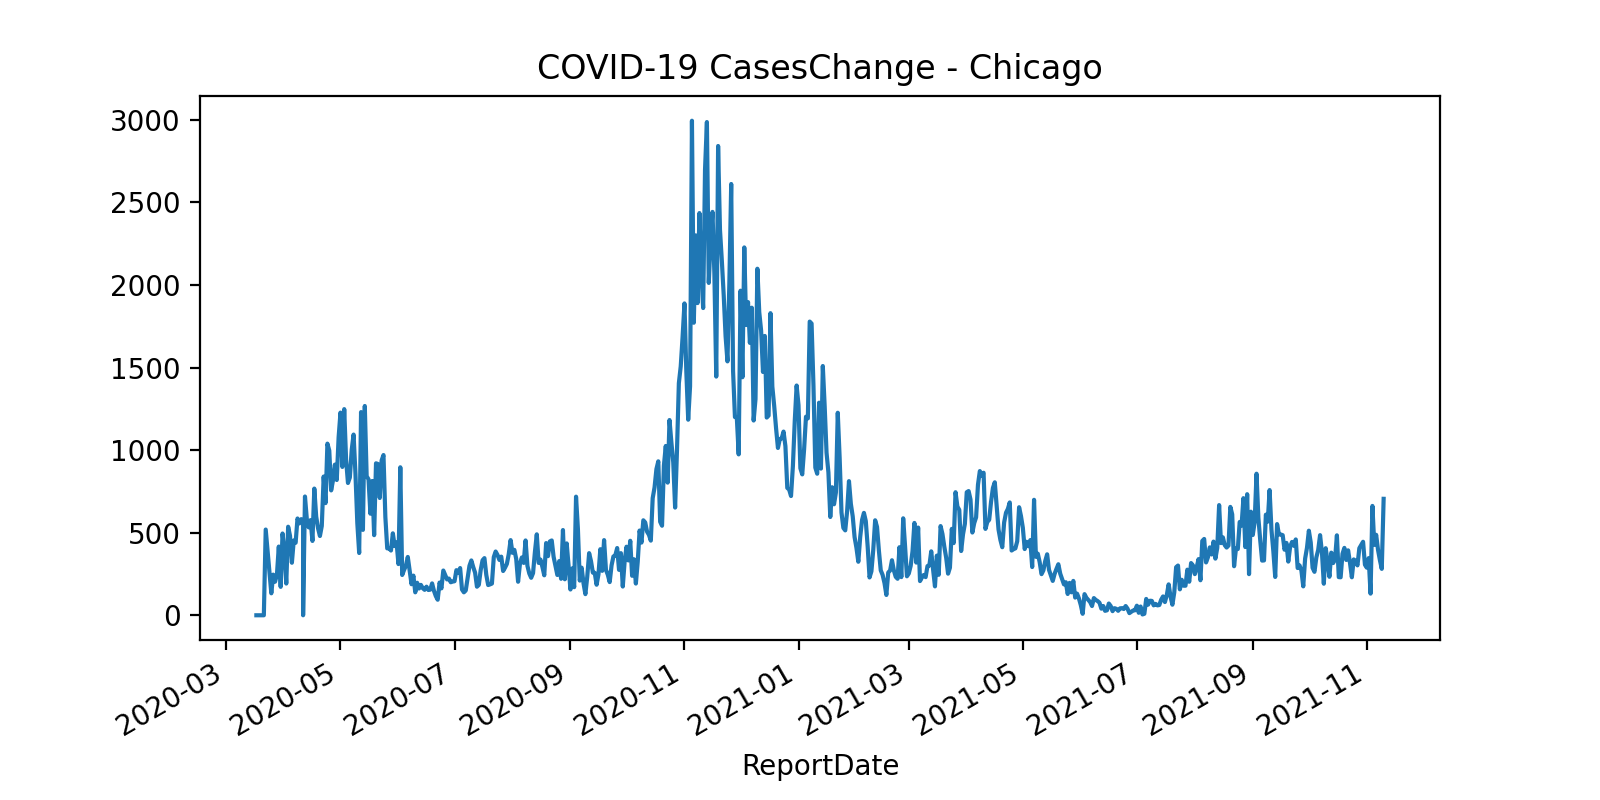

<AxesSubplot:title={'center':'COVID-19 CasesChange - Chicago'}, xlabel='ReportDate'>

In [24]:
county_name = "Chicago" # input a county name here
metric_name = "CasesChange" # which metric/column to plot, see the headers of the original dataframe
one_county = df[df["CountyName"]==county_name].set_index("ReportDate")
fig1, ax1 = plt.subplots(1,1, figsize=(8,4))
title = 'COVID-19 {} - {}'.format(metric_name, county_name)
one_county[metric_name].plot(ax=ax1, title=title, figsize=(8,4))

## Visualize weekly change of new cases across the state

In [ ]:
day0 = np.datetime64('2021-11-09') # YYYY-MM-DD
cum_cases_day0 = df[df["ReportDate"]==day0].set_index("CountyName").CumulativeCases
cum_cases_day0

In [ ]:
day_1week = day0 - np.timedelta64(1,'W')
cum_cases_1week = df[df["ReportDate"]==day_1week].set_index("CountyName").CumulativeCases
cases_this_week = cum_cases_day0.sub(cum_cases_1week)
cases_this_week

In [ ]:
day_2week = day0 - np.timedelta64(2,'W')
cum_cases_2week = df[df["ReportDate"]==day_2week].set_index("CountyName").CumulativeCases
cases_last_week = cum_cases_1week.sub(cum_cases_2week)
cases_last_week

In [ ]:
weekly_change_rate = cases_this_week.sub(cases_last_week).div(cases_last_week)
weekly_change_rate.sort_values()

In [ ]:
colormap = linear.RdYlGn_08.to_step(index=range(6))
colormap

In [ ]:
def classify(rate):
    if rate > 0.5:
        color = 1
    elif rate > 0.1:
        color = 2
    elif rate > -0.1:
        color = 3
    elif rate > -0.5:
        color = 4
    else: # < -0.5
        color = 5
    return color

In [ ]:
weekly_change_rate_class = weekly_change_rate.apply(classify)
weekly_change_rate_class

In [ ]:
map = ipyleaflet.Map(center=[40.6, -89.6],  zoom = 6)
map.add_control(ipyleaflet.LayersControl(position='topright'))
map.add_control(ipyleaflet.ScaleControl(position='bottomleft'))

county_geomoetry_geojson = "idph_geometry.geojson"
with open(county_geomoetry_geojson, 'r') as f:
    layer = ipyleaflet.Choropleth(
                name="Weekly Change of New COVID-19 Cases",
                geo_data=json.load(f),
                choro_data=weekly_change_rate_class.to_dict(),
                colormap= colormap,
                style={'fillOpacity': 0.8})
map.add_layer(layer)
map

In [ ]:
legend = ipyleaflet.LegendControl({"+50%": colormap(1),
                                   "+10% to +50%": colormap(2),
                                   "Steady (-10% to +10%)":colormap(3),
                                   "-10% to -50%":colormap(4), 
                                   "-50%":colormap(5)},
                                   name="Weekly Change of New Cases", position="bottomright")
map.add_control(legend)

In [ ]:
def layer_on_click(**kwargs):
    global ax2
    ax2.cla()
    county_name=kwargs["id"]
    one_county = df[df["CountyName"]==county_name].set_index("ReportDate")
    one_county.CasesChange.plot(ax=ax2, title='COVID-19 Daily Cases - {}'.format(county_name), fontsize=3)
fig2, ax2 = plt.subplots(1,1, figsize=(9,4))
fig2.suptitle("(Click on the Map to view COVID-19 Daily Cases)", fontsize=8)

In [ ]:
layer.on_click(layer_on_click)
map